In [4]:
import pandas as pd

#Uploading the file & reading the data:



In [5]:
from google.colab import files
uploaded = files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset.csv


In [6]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


#Cleaning the data:

###Analysis of columns:

In [7]:
#Coloumn: persom_home_ownership

df.person_home_ownership.value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [57]:
#We'll map the values as following:

person_home_ownership: (RENT= 1, MORTGAGE= 2, OWN= 3, OTHER= 4)

In [8]:
df['person_home_ownership'].replace({'RENT':1,'MORTGAGE':2,'OWN':3, 'OTHER':4}, inplace=True)

In [10]:
#column: loan_intent

df.loan_intent.value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [58]:
#We'll map the values as following:

loan_intent: (EDUCATION= 1, MEDICAL= 2, VENTURE=3, PERSONAL= 4, DEBTCONSOLIDATION= 5, HOMEIMPROVEMENT= 6)

In [11]:
df['loan_intent'].replace({'EDUCATION':1,'MEDICAL':2,'VENTURE':3, 'PERSONAL':4, 'DEBTCONSOLIDATION':5, 'HOMEIMPROVEMENT':6}, inplace=True)

EDUCATION           1,
MEDICAL             2,
VENTURE             3,
PERSONAL             4,
DEBTCONSOLIDATION   5,
HOMEIMPROVEMENT      6,

In [ ]:
df.loan_grade.value_counts()



###Removing rows with missing data:

In [13]:
#checking the number of rows:

print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  32581
Number of columns:  12


In [14]:
#Removing duplicate rows:

df.drop_duplicates(inplace=True)

print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  32416
Number of columns:  12


In [15]:
# percentage of missing values per feature

print((df.isnull().sum() * 100 / df.shape[0]).sort_values(ascending=False))

loan_int_rate                 9.547754
person_emp_length             2.736303
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


In [59]:
#We'll remove the rows with missing values

In [17]:
#dropping the rows with missing data for loan_int_rate & person_emp_length

df.dropna(subset=['loan_int_rate'], inplace=True)
df.dropna(subset=['person_emp_length'], inplace=True)

In [18]:
#Rechecking the percentage of missing value:

print((df.isnull().sum() * 100 / df.shape[0]).sort_values(ascending=False))

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64


#Visualizing the Data:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target Distribution')

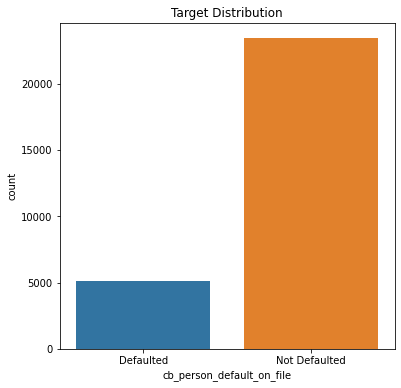

In [69]:
#Visualizing the target column "cb_person_default_on_file"

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.countplot(df['cb_person_default_on_file'])
plt.xticks([0, 1], labels=["Defaulted", "Not Defaulted"])
plt.title("Target Distribution")

In [70]:
df['cb_person_default_on_file'].value_counts()

N    23411
Y     5090
Name: cb_person_default_on_file, dtype: int64

Text(0.5, 1.0, 'Age distribution')

<Figure size 432x432 with 0 Axes>

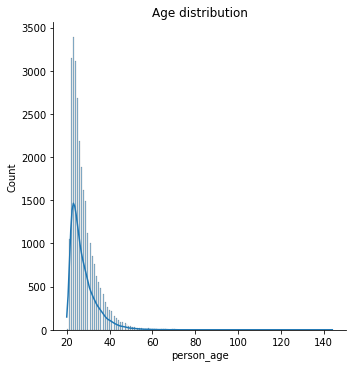

In [75]:
#Visualizing the age column "person_age"

plt.figure(figsize=(6,6))
sns.displot(df['person_age'], kde=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Age distribution")


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Loan intent Distribution')

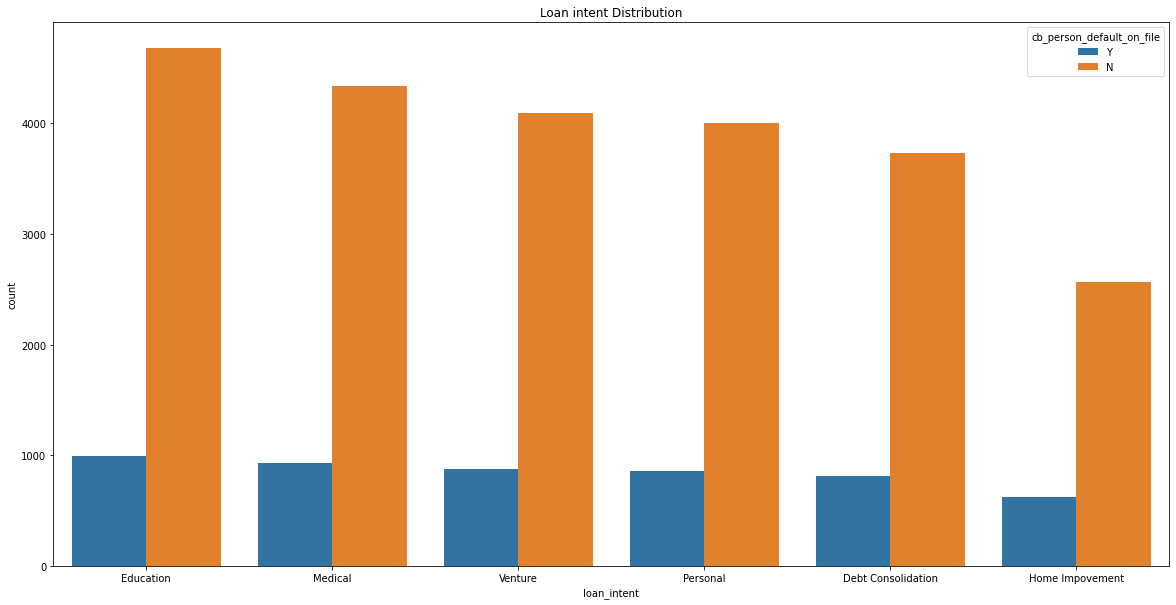

In [81]:
#Visualizing the loan intention column "loan_intent"

plt.figure(figsize=(20,10))
sns.countplot('loan_intent',hue='cb_person_default_on_file',data=df)
plt.xticks([0, 1, 2, 3, 4, 5],labels=["Education", "Medical","Venture", "Personal", "Debt Consolidation", "Home Impovement"])
plt.title("Loan intent Distribution")


#Dependant & Independant Features:

In [31]:
# Independnet features
X = df.drop(['cb_person_default_on_file'], axis=1)
# Dependent feature
y = df['cb_person_default_on_file']
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,1,123.0,4,4,35000,16.02,1,0.59,3
1,21,9600,3,5.0,1,2,1000,11.14,0,0.10,2
2,25,9600,2,1.0,2,3,5500,12.87,1,0.57,3
3,23,65500,1,4.0,2,3,35000,15.23,1,0.53,2
4,24,54400,1,8.0,2,3,35000,14.27,1,0.55,4


###Scaling the features:

In [82]:
#mapping loan_grade column for scalibility 

df.loan_grade.value_counts()

1    9345
2    9094
3    5682
4    3243
5     869
6     209
7      59
Name: loan_grade, dtype: int64

In [33]:
df['loan_grade'].replace({'A':1,'B':2,'C':3, 'D':4, 'E':5, 'F':6, 'G':7}, inplace=True)

df.loan_grade.value_counts()

1    9345
2    9094
3    5682
4    3243
5     869
6     209
7      59
Name: loan_grade, dtype: int64

In [34]:
#scaling the features

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)

###Splitting the data for train-test split:

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

###Data Balancing:

In [36]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE= SMOTE()

# fit and apply the transform 
X_train,y_train= SMOTE.fit_resample(X_train,y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({'N': 18765, 'Y': 4035})
After oversampling:  Counter({'N': 18765, 'Y': 18765})


###Building the model:

In [37]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression

logit= LogisticRegression()
logit.fit(X_train, y_train)

# Predicting the model
pred_logit= logit.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_precision_recall_curve

#eva;uting the model
print("The accuracy model:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

The accuracy model: 0.8351166462024207
              precision    recall  f1-score   support

           N       0.99      0.81      0.89      4646
           Y       0.53      0.95      0.68      1055

    accuracy                           0.84      5701
   macro avg       0.76      0.88      0.78      5701
weighted avg       0.90      0.84      0.85      5701



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


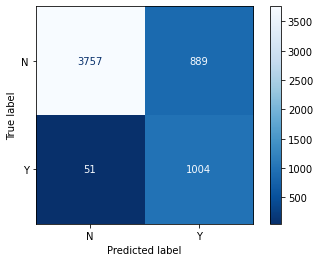

In [89]:
# confusion metrics
plot_confusion_matrix(logit, X_test, y_test, cmap="Blues_r")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


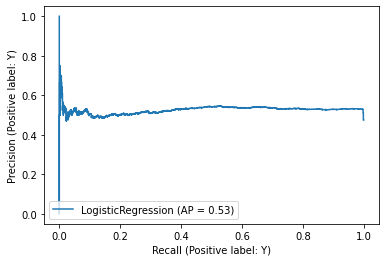

In [90]:
# precision_recall curve
plot_precision_recall_curve(logit,X_test,y_test)

In [39]:
#Random Forest Classifier 

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

# Fitting the model
rf.fit(X_train,y_train)

# Predicting the model
pred_rf= rf.predict(X_test)

In [40]:
#Evaluting the model:

print("The accuracy model:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test,pred_rf ))

The accuracy model: 0.8310822662690756
              precision    recall  f1-score   support

           N       0.94      0.85      0.89      4646
           Y       0.53      0.74      0.62      1055

    accuracy                           0.83      5701
   macro avg       0.73      0.80      0.75      5701
weighted avg       0.86      0.83      0.84      5701



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


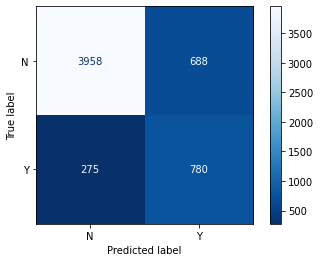

In [87]:
# confusion metrics
plot_confusion_matrix(rf, X_test, y_test, cmap="Blues_r")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


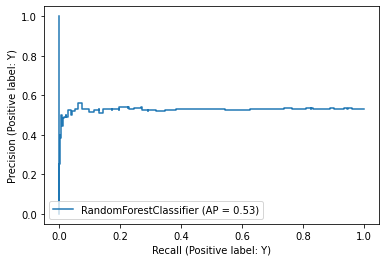

In [88]:
# precision_recall curve
plot_precision_recall_curve(rf,X_test,y_test)

In [47]:
#XGBoost Classifier

import xgboost as xgb

xgb_clf= xgb.XGBClassifier()
#fitting the model
xgb_clf.fit(X_train,y_train)
## Predicting the model
xgb_predict= xgb_clf.predict(X_test)

In [42]:
#Evaluting the model:

print("The accuracy model:", accuracy_score(y_test, xgb_predict))
print(classification_report(y_test,xgb_predict ))

The accuracy model: 0.8365199087879319
              precision    recall  f1-score   support

           N       1.00      0.80      0.89      4646
           Y       0.53      0.99      0.69      1055

    accuracy                           0.84      5701
   macro avg       0.76      0.90      0.79      5701
weighted avg       0.91      0.84      0.85      5701



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


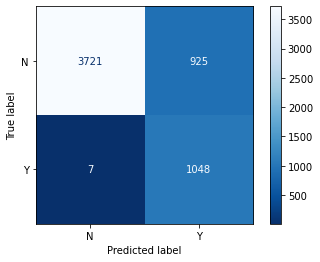

In [91]:
#confusion metrics
plot_confusion_matrix(xgb_clf, X_test, y_test, cmap="Blues_r")


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


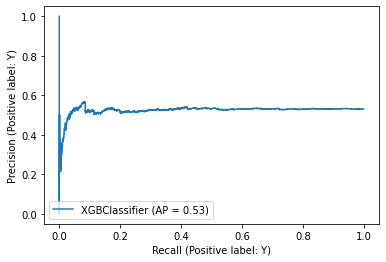

In [92]:
# precision_recall curve
plot_precision_recall_curve(xgb_clf,X_test,y_test)

In [43]:
#Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_search=RandomizedSearchCV(xgb_clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

# fitting the RandomizedSearchCV
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [44]:
# Finding the best estimators
random_search.best_estimator_
# Finding the best param
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 12,
 'learning_rate': 0.2,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [50]:
classifier = xgb.XGBClassifier(objective='binary:logistic',
                                  gamma=0.2,
                                  learning_rate=0.15,
                                  max_depth=15,
                                  reg_lambda=10,
                                  min_child_weight=1,
                                  subsample=0.9, 
                                  colsample_bytree=0.50,
                                  use_label_encoder=False)

# Fitting the model
classifier.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=15,
              reg_lambda=10, subsample=0.9, use_label_encoder=False)

In [51]:
# Predicting model
y_pred= classifier.predict(X_test)

In [53]:
#Evaluting the model after tuning:

print("Accuracy of the model:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred ))

The accuracy model: 0.8203823890545519
              precision    recall  f1-score   support

           N       0.90      0.88      0.89      4646
           Y       0.51      0.58      0.54      1055

    accuracy                           0.82      5701
   macro avg       0.71      0.73      0.72      5701
weighted avg       0.83      0.82      0.82      5701



# Cross Validation:

In [54]:
from sklearn.model_selection import cross_val_score

SC = cross_val_score(classifier, X, y, cv=10)


In [56]:
SC.mean()

0.8195505547453342

# Conclusion:

##### The final accuracy of the model is 82% (2 s.f)